# FINDING BEST MARKET TO ADVERTISE COURSES.

Giả sử , Tôi làm việc cho công ty học trực tuyến e-learning cung cấp khóa học về lập trình. Hầu hết các khóa học của chúng tôi là Web development và Mobile development, tuy nhiên vẫn có các khóa học khác như data science, game development,....Công ty tôi muốn giới thiệu sản phẩm và đầu tư một khoản tiền cho quảng cáo. Mục tiêu của chúng tôi là tìm ra 2 thị trường tốt nhất cho quảng cáo sản phẩm của chúng tôi.

# Understanding the Data

Để tránh việc lãng phí cho khảo sát các lập trình viên. Tôi đã sử dụng data có sẵn để xác định mục tiêu của mình. Một ứng cử viên tốt là [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). Khảo sát này thu hút nhiều lập trình viên mới với nhiều lĩnh vực mà họ quan tâm( không chỉ là Web Development).

Khảo sát này được công khai trên [Kho Github](https://github.com/freeCodeCamp/2017-new-coder-survey). Bên dưới, tôi sẽ khám pá ```2017-fCC-New-Coder-Survey-Data.csv``` file được lưu trong thư mục ```clean data```.   

In [1]:
import pandas as pd
survey = pd.read_csv("data/2017-fCC-New-Coders-Survey-Data.csv",low_memory=0)
pd.options.display.max_columns=150
print(survey.shape)
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

# Checking For Sample Representativity

Tôi cần biết dataset này có đại diện là hầu hết mọi người quan tâm đến lĩnh vực của chúng tôi hay không. Cột ```JobRoleInterest``` miêu tả các lĩnh vực công việc mà họ quan tâm. Nếu 1 người quan tâm đến lĩnh vực trong công việc, thì họ cũng muốn học và tìm hiểu về lĩnh vực đó.

In [2]:
pd.options.display.max_rows=100
survey["JobRoleInterest"].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                           11.770595
  Front-End Web Developer                                                                                           6.435927
  Data Scientist                                                                                                    2.173913
Back-End Web Developer                                                                                              2.030892
  Mobile Developer                                                                                                  1.673341
                                                                                                                     ...    
Information Security, Full-Stack Web Developer,   Data Scientist, Back-End Web Developer                            0.014302
  Mobile Developer, Game Developer,   Front-End Web Developer,   User Experience Designer                           0.014302


Thông tin trên là khá chi tiết, cho thấy:
* Rất nhiều người quan tâm đến Web Development( Full-Stack,Front-End và Back-End ).
* Một số là quan tâm đến Mobile Development.
* Một số người quan tâm các lĩnh vực khác.

Tôi sẽ chú ý rằng một số người quan tâm hơn 1 lĩnh vực. Điều này tôi cần một bức tranh tốt hơn để xem có bao nhiêu người quan tâm 1 lĩnh vực duy nhất và bao nhiêu người quan tâm trên 2 lĩnh vực. Tôi sẽ làm như sau:

* Tôi dùng ```split``` cho cột ```JobRoleInterest``` để lấy số lượng lựa chọn mà những người tham gia quan tâm.
    * Lưu ý rằng, tôi cần phải xóa các giá trị ```Null``` trước khi dùng ```split```, bởi vì nó không cắt được giá trị ```Null```
* Tiếp theo, tôi sẽ tạo ra bảng tần số để biết chi tiết tỉ lệ cho số lượng lựa chọn.

In [3]:
interest_no_null=survey["JobRoleInterest"].dropna()
split_interest=interest_no_null.str.split(",")
n_options=split_interest.apply(lambda x: len(x))
n_options.value_counts(normalize=True) * 100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64

Chỉ ```31.65%``` người tham gia quan tâm một lĩnh vực duy nhất, còn lại là quan tâm trên 2 lĩnh vực. Công ty cung cấp khóa học với nhiều lĩnh vực khác nhau, vì vậy những người quan tâm trên 2 lĩnh vực

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


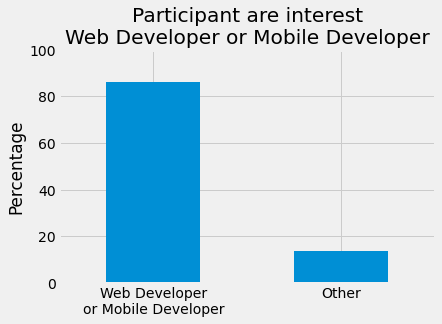

In [4]:
web_or_mobile=interest_no_null.str.contains("Web Developer|Mobile Developer")
freq_table=web_or_mobile.value_counts(normalize=True) * 100
print(freq_table)

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
freq_table.plot.bar()
plt.title("Participant are interest\nWeb Developer or Mobile Developer")
plt.ylabel("Percentage")
plt.xticks([0,1],["Web Developer\nor Mobile Developer","Other"],rotation=0)
plt.ylim(0,100)
plt.show()

Có ```86.24%``` số người tham gia quan tâm đến Web & Mobile Development. Vì vậy, dataset này hữu ích cho công ty của tôi. Công ty chúng tôi muốn quảng cáo các khóa học với nhiều lĩnh vực khác nhau, nhưng hầu hết là Web & Mobile Development. Tôi sẽ tìm ra thị trường tốt nhất để quảng cáo. Tôi sẽ cần biết:
* Các lập trình viên mới hiện đang sống ở đâu.
* Quốc gia nào có số lượng lập trình viên lớn nhất.
* Những lập trình viên chi tiền cho việc học mỗi tháng là bao nhiêu.

# New Coders - Locations - Densities

Tôi sẽ tìm hiểu cột ```CountryLive``` bởi vì tôi cần biết người tham gia khảo sát đang sống thực sự ở đâu nơi mà công ty tôi sẽ chạy quảng cáo. 

In [5]:
survey_good=survey[survey["JobRoleInterest"].notnull()].copy()

country_absolute=survey_good["CountryLive"].value_counts()
country_percentage=survey_good["CountryLive"].value_counts(normalize=True)*100

freq_country=pd.DataFrame(data={"Number Coders":country_absolute,"Percentage":country_percentage})
freq_country

,Number Coders,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Rwanda,1,0.014624
Papua New Guinea,1,0.014624
Gambia,1,0.014624
Angola,1,0.014624


Có tận gần 45.7% ở thị trường hoa kì quan tâm tới lập trình, điều đó chứng tỏ đây là thị trường tiềm năng để công ty chúng tôi có thể chạy quảng cáo. Ở vị trí thứ 2 là India với 7.72%, tuy nhiên 2 thị trường UK,Canada có khoảng cách rất gần với India.
* Thông tin thêm: Một chỉ số của một thị trường tốt là số lượng khách hàng tiềm năng- càng nhiều khách hàng tiềm năng trong một thị trường thì càng tốt. Nếu quảng cáo của chúng tôi thuyết phục 10% của 5000 khách hàng ở thị trường A sẽ tốt hơn thuyết phục 100% của 30 khách hàng ở thị trường B.

Đây là thông tin hữu ích, tôi sẽ cần đi sâu hơn để xem từng thị trường sẽ chi bao nhiêu tiền cho việc học. Quảng cáo ở thị trường mà hầu hết mọi người chỉ sẵn sàng học miễn phí thì công ty tôi sẽ rất khó kiếm được lợi nhuận.

# Spending Money For Learning

Cột ```MoneyforLearning``` cung cấp thông tin mà những người tham gia khảo sát phải chi tiêu cho việc học từ thời điểm bắt đầu cho đến thời điểm họ hoàn thành cuộc khảo sát này. Giả sử, công ty chúng tôi muốn bán với giá 59$ mỗi tháng cho việc duy trì khóa học, vì điều này tôi cần phải quan tâm đến việc tìm hiểu mỗi học viên chi tiêu bao nhiêu mỗi tháng.
Một ý kiến hay là thu hẹp phân tích chỉ ở 4 quốc gia: Hoa Kì, Ấn độ, Vương quốc Anh và Canada. Với 2 lí do sau đây:
* Đây là những quốc gia có số lượng người tham gia cao nhất trong dataset, có nghĩa là tôi sẽ có một lượng dữ liệu phù hợp với từng quốc gia.
* Các khóa học mà công ty tôi được viết bằng tiếng Anh và tiếng Anh là ngôn ngữ chính ở tất cả các quốc gia này. Càng nhiều người biết tiếng Anh chúng tôi càng có cơ hội nhắm mục tiêu đúng người với quảng cáo của mình.

Bây giờ , tôi cần phải biết số tiền chi tiêu mỗi tháng của những người tham gia, tôi sẽ tạo cột ```money_per_month``` trong dataset, bằng cách lấy cột ```MoneyforLearning``` chia cho cột ```MonthsProgramming``` - ```MonthsProgramming``` miêu tả số tháng những người tham gia học lập trình. Tuy nhiên, sẽ có những người tham gia khảo sát sẽ trả lời là 0 cho ```MonthsProgramming```, vì vậy để tránh chia cho 0, tôi sẽ thay thế 0 bằng 1 trong ```MonthsProgramming```.


In [6]:
survey_good["MonthsProgramming"]=survey_good["MonthsProgramming"].replace(0,1)

survey_good["money_per_month"]=survey_good["MoneyForLearning"]/survey_good["MonthsProgramming"]

survey_good["money_per_month"].isnull().sum()

675

Có 675 hàng không có giá trị ở money_per_month, vì vậy tôi cần phải xóa các hàng này ra khỏi dataset.


In [7]:
survey_good=survey_good[survey_good["money_per_month"].notnull()].copy()

Tôi sẽ nhóm theo 4 quốc gia đã đề cập ở trên và tính trung bình mỗi người chi bao nhiêu mỗi tháng cho việc học. Nhưng đầu tiên tôi phải xóa các hàng không có giá trị ở cột ```CountryLive``` ra khỏi dataset.

In [8]:
survey_good=survey_good[survey_good["CountryLive"].notnull()].copy()

countries_mean=survey_good.groupby("CountryLive").mean()
countries_mean["money_per_month"][["United States of America","India","United Kingdom","Canada"]]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

Khá bất ngờ, số tiền chi mỗi tháng của Anh và Canada lại thấp hơn Ấn độ. Xét về chỉ số kinh tế xã hội (như GDP đầu người) thì Ấn độ lại thấp hơn rất nhiều so với 2 nước còn lại. Tôi mong đợi là Anh và Canada sẽ dành nhiều tiền cho việc học hơn Ấn độ.
Có thể dữ liệu này sẽ không đủ đại diện cho Anh và Canada, hoặc có một số ngoại lai ( có thể đến từ câu trả lời khảo sát sai ), làm cho trung bình của Ấn độ quá lớn, hoặc quá thấp so với Anh và Canada. Hoặc nó có thể là kết quả đúng, có thể Anh và Canada ưa chuộng những khóa học free hơn Ấn độ. Vì vậy tôi cần thêm phân tích để làm rõ những nghi vấn này.

# Dealing with Extreme Outlier

Tiếp theo, tôi sẽ tạo biểu đồ hình hộp cho 4 quốc gia để hình dung được sự phân phối của biến ```money_per_month``` số tiền chi tiêu mỗi tháng 

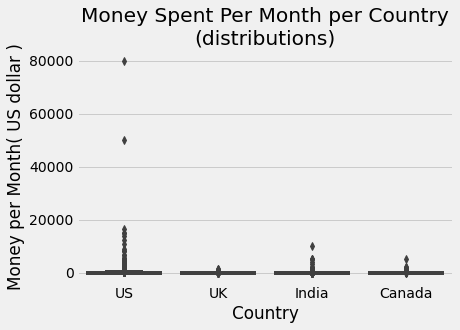

In [9]:
only_4=survey_good[survey_good["CountryLive"].str.contains("United States of America|India|Canada|United Kingdom")]

import seaborn as sns

sns.boxplot(x="CountryLive",y="money_per_month",data=only_4)
plt.title("Money Spent Per Month per Country\n(distributions)")
plt.xlabel("Country")
plt.ylabel("Money per Month( US dollar )")
plt.xticks(range(4),["US","UK","India","Canada"])
plt.show()

Biểu đồ này rất khó để hình dung phân phối của thị trường Ấn độ, Anh và Canada. Nên rất khó để đưa ra suy luận về 3 thị trường này. Tuy nhiên, ở Hoa Kì có 2 người lại chi tiêu hơn 50.000 USD cho việc học, điều này không phải là không thể, nhưng lại rất khó xảy ra. Vì vậy, tôi sẽ xóa giá trị vượt qua 20.000 USD mỗi tháng ra khỏi dataset 

In [10]:
only_4=only_4[only_4["money_per_month"] < 20000]

country_mean=only_4.groupby("CountryLive").mean()
country_mean["money_per_month"]

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: money_per_month, dtype: float64

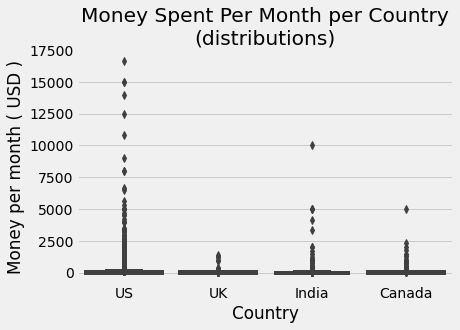

In [11]:
sns.boxplot(x="CountryLive",y="money_per_month",data=only_4)
plt.title("Money Spent Per Month per Country\n(distributions)")
plt.xlabel("Country")
plt.ylabel("Money per month ( USD )")
plt.xticks(range(4),["US","UK","India","Canada"])
plt.show()

Ở Ấn Độ, có thể thấy các giá trị ngoại lai( trên 2500USD ). Có thể họ đã tham gia các mô hình đào tạo Bootcamp, chương trình học này có xu hướng rất đắt. Tôi sẽ quan tâm 2 điểm dữ liệu này để xem có điều bất thường nào xảy ra hay không.
* Thông tin thêm:
    * Bootcamp là mô hình đạo tạo dưới dạng trại huấn luyện cường độ cao trong thời gian ngắn, tập trung giảng dạy các vấn đề "thực chiến".

In [12]:
india_outlier=only_4[(only_4["CountryLive"]=="India")&(only_4["money_per_month"]>=2500)]
india_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

Có thể thấy rằng, có những người không tham gia một khóa học đào tạo Bootcamp nào. Nhìn chung, rất khó để biết rằng họ có thực sự chi nhiều tiền cho việc học hay không. Câu hỏi thực tế để khảo sát cho cột ```AttendedBootcamp``` là ```"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)"```( tìm hiểu câu hỏi này ở [raw-data-part1](https://github.com/freeCodeCamp/2016-new-coder-survey/blob/master/raw-data/2016%20New%20Coders%20Survey%20Part%201.csv)). Vì vậy, có thể những người tham gia khảo sát đã hiểu nhầm, họ đã trả lời bao gồm cả học phí đại học. Có vẻ an toàn hơn nếu tôi sẽ xóa các hàng này ra khỏi dataset.

In [13]:
only_4=only_4.drop(india_outlier.index)

Nhìn vào biểu đồ trên, các giá trị ngoại lai ở Hoa Kì ( trên 6000 USD), tôi cũng sẽ theo dõi những tham gia khảo sát này như ở Ấn độ. Để xem có sự bất thường xảy ra không.

In [14]:
us_outlier=only_4[(only_4["CountryLive"]=="United States of America")&(only_4["money_per_month"]>=6000)]
us_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Trong số 11 ngoại lai này có 6 người tham gia bootcamp, điều này cho thấy họ đã chi số tiền lớn cho việc học, 5 người còn lại không tham gia bootcamp nào, rất khó để biết họ có chi nhiều tiền cho việc học hay không. Vì vậy, tôi sẽ xóa 5 hàng này.
Ngoài ra, dữ liệu cho thấy 8 người trả lời đã lập trình không quá 3 tháng ở cột ```MonthsProgramming```, có thể họ đã trả số tiền lớn khóa học bootcamp kéo dài trong vài tháng. Vì vậy, việc họ chi tiền cho mỗi tháng sẽ không thực tế và sẽ thấp hơn đáng kể ( bởi vì họ có thể không chi tiêu gì cho vài tháng sau cuộc khảo sát ). Do đó, tôi cũng sẽ loại bỏ dữ liệu này.
Trong mã code tiếp theo, tôi sẽ loại bỏ dữ liệu ngoại lai:
* Không tham gia khóa học bootcamp nào
* Có ```MonthsProgramming``` bằng 3 tháng hoặc ít hơn.

In [15]:
no_bootcamp=only_4[
    (only_4["CountryLive"]=="United States of America") &
    (only_4["AttendedBootcamp"]==0)&
    (only_4["money_per_month"]>=6000)]
only_4=only_4.drop(no_bootcamp.index)

less_than_3=only_4[
    (only_4["CountryLive"]=="United States of America") &
    (only_4["MonthsProgramming"]<=3)&
    (only_4["money_per_month"]>=6000)]
only_4=only_4.drop(less_than_3.index)

Biểu đồ trên cho thấy Canada có 1 giá trị ngoại lai, tôi tiếp tục quan sát giá trị này , xem nó có xảy ra điều bất thường nào không.

In [16]:
canada_outlier=only_4[
    (only_4["CountryLive"]=="Canada")&
    (only_4["money_per_month"] > 4500)]
canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Thấy rằng, người này có tham gia 1 chương trình Bootcamp nên việc chi số tiền lớn cho việc học có thể giải thích được. Tuy nhiên, ở cột ```MonthsProgramming``` chỉ có 2 tháng, giống như các ngoại lai của Hoa Kì, dữ liệu này không mô tả được thực tế người này chi tiêu 1 tháng cho việc học là bao nhiêu, bởi vì có thể họ đã chi trả số tiền cho chương trình học kéo dài vài tháng, những tháng tiếp theo có thể họ không chi số tiền nào.
Vì vậy, tôi sẽ xóa dữ liệu này ra khỏi dataset.

In [17]:
only_4=only_4.drop(canada_outlier.index)

In [18]:
country_mean=only_4.groupby("CountryLive").mean()
country_mean["money_per_month"]

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

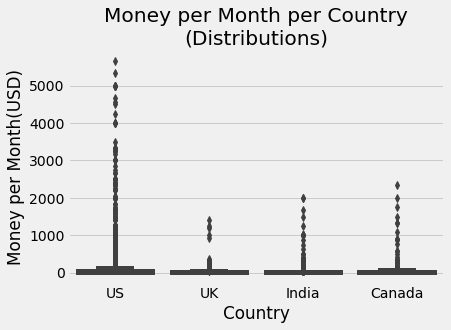

In [20]:
sns.boxplot(x="CountryLive",y="money_per_month",data=only_4)
plt.title("Money per Month per Country\n(Distributions)")
plt.xlabel("Country")
plt.ylabel("Money per Month(USD)")
plt.xticks(range(4),["US","UK","India","Canada"])
plt.show()

# Choose Two Best Markets

Rõ ràng 1 quốc gia mà chúng tôi muốn quảng cáo nhất chính là Hoa Kì. Rất nhiều lập trình viên mới sống ở đó và họ chịu chi số tiền kha kha cho việc học mỗi tháng ( khoảng 143 dollars).

Mục tiêu chúng tôi là bán khóa học 49 USD mỗi tháng thì thị trường tiếp theo chúng tôi quan tâm đó là Canada ( khoảng 93 USD mỗi tháng) và India ( khoảng 66 USD mỗi tháng ). Nếu nhìn vào số liệu này, có thể chúng tôi sẽ lựa chọn Canada là thị trường muốn quảng cáo. Tuy nhiên, 49 USD cũng không là quá cao so với Ấn độ, bởi vì trung bình mỗi người chi 66 USD mỗi tháng. Và chúng tôi có lượng khách hàng tiềm năng ở Ấn Độ nhiều hơn gần gấp đôi so với Canada: 

In [21]:
only_4["CountryLive"].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Vì vậy, không rõ ràng khi lựa chọn giữa 2 thị trường Ấn Độ và Canada. Có thể Canada là thị trường hấp dẫn hơn nhưng Ấn độ lại là lựa chọn tốt vì có số lượng khách hàng tiềm năng nhiều hơn. 

Có thể chúng tôi sẽ cân nhắc mục tiêu là quảng cáo ở 2 thị trường thay cho 3 thị trường. Có thể chia ngân sách : 60% cho Hoa Kì, 25% cho Ấn Độ, 15% cho Canada.

Hoặc tốt nhất là chúng tôi nên đưa bản phân tích này cho nhóm marketing để họ dùng kiến thức miền của họ để quyết định. Họ sẽ thực hiện thêm khảo sát ở Ấn Độ và Canada và sau đó đưa dữ liệu khảo sát quay lại cho chúng tôi phân tích khảo sát mới.

# Conclusion

Ở dự án này, chúng tôi đã phân tích dữ liệu khảo sát của lập trình viên để lựa chọn 2 thị trường tốt nhất để quảng cáo. Thị trường chúng tôi chắc chắn để quảng cáo là Hoa Kì.

Thị trường tiếp theo, chúng tôi lại phân vân giữa Ấn Độ và Canada. Vì vậy chúng tôi đã gửi bản phân tích này cho nhóm marketing để họ dùng kiến thức miền để đưa quyết định tốt nhất.